# Projeto 3

**Alunos:** Ellen Shen, Enzo Neto, Gabriel Huerta, Giulia Castro

Turma B

___

Este projeto consiste em fazer uma análise exploratória, utilizando a técnica de clusterização, sob uma base de dados do spotify. A **clusterização** é um algoritmo de machine learning, que une os dados similiares em diferentes grupos.

**A pergunta que iremos responder é:** "Dado uma playlist com gêneros musicais diferentes. Um usuário está escutando uma determinada música desta playlist, qual seria a melhor música para ser recomendada como a próxima?"

In [27]:
%matplotlib notebook

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

np.random.seed(42)

In [12]:
top_2017_2018_teste, top_2017_2018_treinamento = train_test_split(pd.read_excel("top2018_2017.xlsx", index_col=1),train_size=0.20)

/Users/ellenbeatriz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [13]:
top_2017_2018_treinamento.head()

,id,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,,,,,,,,,,,,,,,
Too Good At Goodbyes,1mXVgsBdtIVeCLJnSnmtd,Sam Smith,0.698,0.375,5.0,-8279.0,1.0,0.0491,0.65200,0.00000,0.173,0.5340,91.92,201000.0,4.0
Nevermind,63SevszngYpZOwf63o61K,Dennis Lloyd,0.592,0.691,3.0,-8354.0,1.0,0.1960,0.15600,0.00001,0.418,0.0796,99976.00,156600.0,4.0
Thunder,0tKcYR2II1VCQWT79i5Nr,Imagine Dragons,0.600,0.810,0.0,-4749.0,1.0,0.0479,0.00683,0.21000,0.155,0.2980,167.88,187147.0,4.0
Starving,6875MeXyCW0wLyT72Eetm,Hailee Steinfeld,0.721,0.626,4.0,NaN,1.0,0.1230,0.40200,0.00000,0.102,0.5580,99914.00,181933.0,4.0
Despacito (Featuring Daddy Yankee),4aWmUDTfIPGksMNLV2rQP,Luis Fonsi,0.660,0.786,2.0,-4757.0,1.0,0.1700,0.20900,0.00000,0.112,0.8460,177833.00,228200.0,4.0


In [14]:
top_2017_2018_teste.head()

,id,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,,,,,,,,,,,,,,,
Solo Dance,6HUnnBwYZqcED1eQztxMB,Martin Jensen,0.744,0.836,6.0,-2396.0,0.0,0.0507,0.04350,0.000000,0.194,0.360,114965.00,174933.0,4.0
Havana,1rfofaqEpACxVEHIZBJe6,Camila Cabello,0.765,0.523,2.0,-4333.0,1.0,0.0300,0.18400,0.000036,0.132,0.394,104988.00,217307.0,4.0
Closer,7BKLCZ1jbUBVqRi2FVlTV,The Chainsmokers,0.748,0.524,8.0,-5599.0,1.0,0.0338,0.41400,0.000000,0.111,0.661,95.01,244960.0,4.0
Something Just Like This,6RUKPb4LETWmmr3iAEQkt,The Chainsmokers,0.617,0.635,11.0,-6769.0,0.0,0.0317,0.04980,0.000014,0.164,0.446,103019.00,247160.0,4.0
Stir Fry,2UVbBKQOdFAekPTRsnkzc,Migos,0.815,0.816,2.0,-5474.0,1.0,0.2690,0.00299,0.000000,0.159,0.498,181967.00,190288.0,4.0


## Divisão em Clusters

Escolhemos as variáveis "danceability", "energy" e "valence" para separar os clusters.

<IPython.core.display.Javascript object>


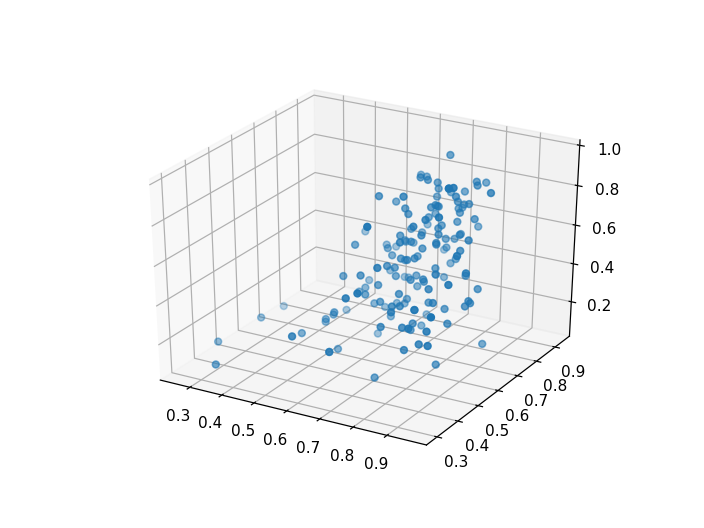

In [15]:
plt3d_2017_2018 = plt.figure().gca(projection="3d")
plt3d_2017_2018.scatter(top_2017_2018_treinamento.danceability, top_2017_2018_treinamento.energy, top_2017_2018_treinamento.valence)

In [16]:
dados_entrada_2017_2018 = top_2017_2018_treinamento.loc[:,("danceability", "energy", "valence")]

In [17]:
clusters_2017_2018 = cluster.MiniBatchKMeans(n_clusters=5)
clusters_2017_2018.fit(dados_entrada_2017_2018)
saida_2017_2018 = clusters_2017_2018.predict(dados_entrada_2017_2018)

A partir das variáveis, separamos em 5 clusters e fizemos um "predict" do nosso dataset.

In [18]:
saida_2017_2018

array([3, 1, 1, 0, 2, 1, 4, 0, 1, 0, 2, 2, 3, 2, 2, 2, 3, 1, 0, 2, 0, 2,
       3, 4, 3, 3, 3, 3, 4, 0, 4, 3, 1, 1, 0, 4, 3, 2, 1, 3, 2, 1, 0, 4,
       2, 2, 3, 3, 0, 0, 4, 1, 1, 3, 4, 4, 2, 0, 4, 2, 0, 2, 3, 1, 2, 2,
       2, 0, 3, 0, 2, 4, 4, 0, 3, 1, 0, 4, 1, 1, 3, 2, 3, 1, 1, 0, 1, 0,
       3, 4, 0, 0, 3, 0, 0, 3, 2, 3, 0, 0, 1, 3, 3, 2, 0, 1, 3, 2, 0, 0,
       0, 1, 0, 2, 2, 2, 4, 2, 0, 3, 0, 0, 1, 0, 2, 0, 3, 2, 2, 0, 1, 1,
       0, 0, 0, 0, 0, 4, 1, 2, 2, 4, 0, 3, 4, 3, 1, 0, 0, 4, 0, 0, 2, 1,
       3, 2, 4, 1, 2, 3], dtype=int32)

In [19]:
musicas_2017_2018 = dados_entrada_2017_2018.copy()
musicas_2017_2018["saida"] = saida_2017_2018
musicas_2017_2018.head()

,danceability,energy,valence,saida
name,,,,
Too Good At Goodbyes,0.698,0.375,0.5340,3
Nevermind,0.592,0.691,0.0796,1
Thunder,0.600,0.810,0.2980,1
Starving,0.721,0.626,0.5580,0
Despacito (Featuring Daddy Yankee),0.660,0.786,0.8460,2


<IPython.core.display.Javascript object>


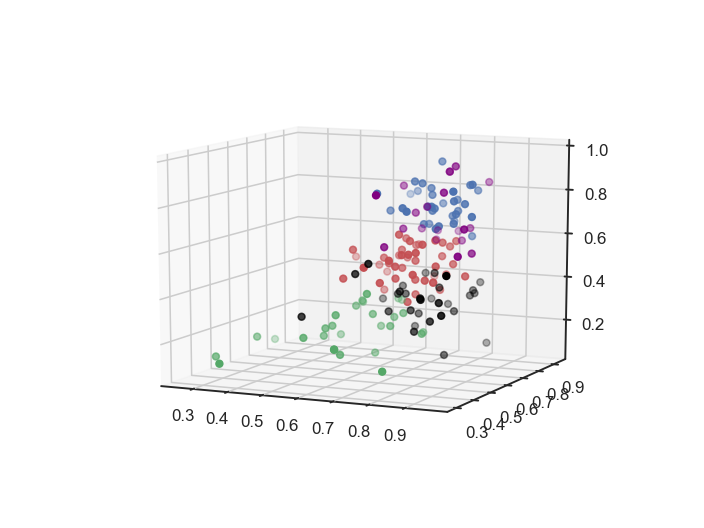

In [47]:
plt3d_2017_2018 = plt.figure().gca(projection="3d")
grupo1_2017_2018 = musicas_2017_2018[musicas_2017_2018.saida==0]
grupo2_2017_2018 = musicas_2017_2018[musicas_2017_2018.saida==1]
grupo3_2017_2018 = musicas_2017_2018[musicas_2017_2018.saida==2]
grupo4_2017_2018 = musicas_2017_2018[musicas_2017_2018.saida==3]
grupo5_2017_2018 = musicas_2017_2018[musicas_2017_2018.saida==4]

plt3d_2017_2018.scatter(grupo1_2017_2018.danceability, grupo1_2017_2018.energy, grupo1_2017_2018.valence, color="r")
plt3d_2017_2018.scatter(grupo2_2017_2018.danceability, grupo2_2017_2018.energy, grupo2_2017_2018.valence, color="g")
plt3d_2017_2018.scatter(grupo3_2017_2018.danceability, grupo3_2017_2018.energy, grupo3_2017_2018.valence, color="b")
plt3d_2017_2018.scatter(grupo4_2017_2018.danceability, grupo4_2017_2018.energy, grupo4_2017_2018.valence, color="black")
plt3d_2017_2018.scatter(grupo5_2017_2018.danceability, grupo5_2017_2018.energy, grupo5_2017_2018.valence, color="purple")


In [ ]:
top_2017_2018.danceability.plot.hist(density=True, bins=20)

In [ ]:
top_2017_2018.energy.plot.hist(density=True, bins=20)

In [ ]:
top_2017_2018.liveness.plot.hist(density=True, bins=15)

## Análise sobre os Resultados

**Dançabilidade** descreve se a música combina com a sua caracteristica levando em conta a combinação de elementos musicais como o tempo, estabilidade do ritmo, força da batida e regularidade no geral. O valor varia de 0.0 à 1.0.

**Energia** é medida entre 0.0 e 1.0, representa a medida percentual da intensiade da atividade. Tipicamente, musicas energéticas são rapidas, altas e muito barulhentas. Um exemplo é o "Death metal" que tem uma energia alta, enquanto o "Bach" tem uma pontuacao baixa na escala.

**Valência** da musica é medida entre 0.0 e 1.0, descrevendo a positividade da música transmitida pela mesma. Músicas com uma valência alta tem um som mais positivo, como por exemplo felicidade, alegria e euforia. Por outro lado, músicas com valor baixo de valência, soam mais negativas, deprimentes.

In [28]:
variaveis_x = ["danceability","energy","valence"]
variaveis_y = variaveis_x

- **Grupo 1: Grupo vermelho** 
  - Como pode ser visto no gráfico acima as músicas pertencentes a esse grupo apresentam dançabilidade e energia altas e com valores de valência medianos

<IPython.core.display.Javascript object>


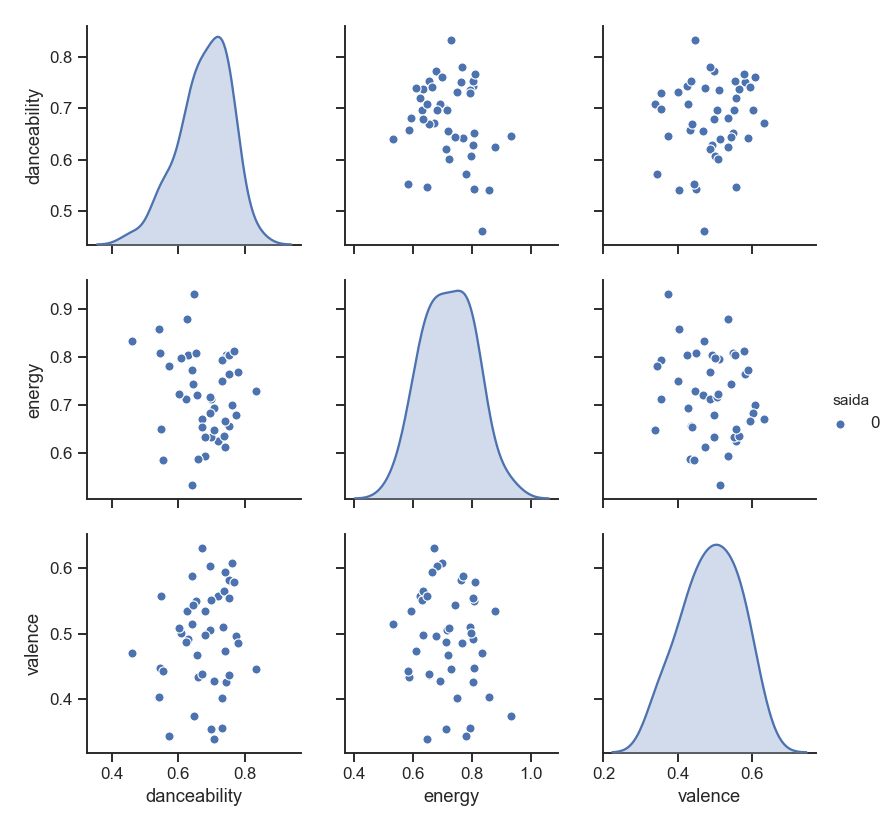

In [34]:
sns.set(style="ticks")
sns.pairplot(grupo1_2017_2018, hue="saida", x_vars=variaveis_x, y_vars=variaveis_y)

<IPython.core.display.Javascript object>


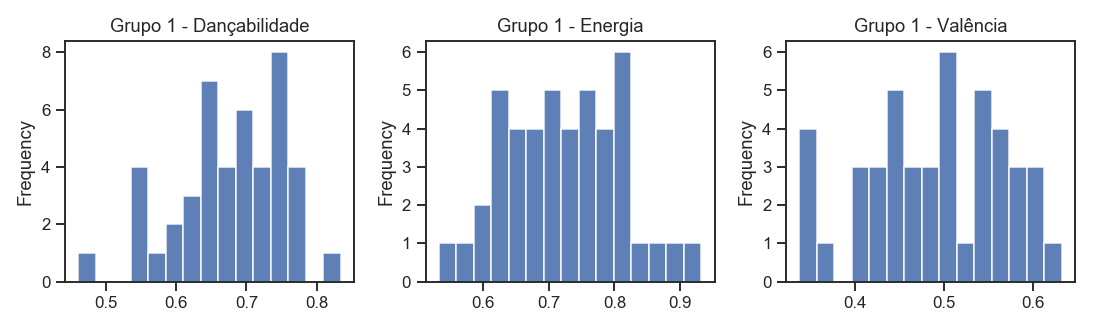

In [87]:
fig = plt.figure(figsize=(10, 3))
plt.subplot(131)
plot = grupo1_2017_2018.danceability.plot.hist(bins=15, title='Grupo 1 - Dançabilidade', alpha=0.9)

plt.subplot(132)
plot = grupo1_2017_2018.energy.plot.hist(bins=15, title='Grupo 1 - Energia', alpha=0.9)

plt.subplot(133)
plot = grupo1_2017_2018.valence.plot.hist(bins=15, title='Grupo 1 - Valência', alpha=0.9)

plt.tight_layout(1)

Os gráficos plotados acima confirmam as hipóteses anteriores. Como pode-se perceber, nesse grupo os valores de dançabilidade giram em torno de 0.8, os de energia próximos à 0.9 e os de valência próximos ã 0.6. 
Conclui-se, então, que as músicas pertencentes ao Grupo 1 são dançáveis, bem rápidas e barulhentas, porém não são tão positivas 

- **Grupo 2: Grupo verde**
    - Observando o segundo gráfico de dispersão, pode-se observar que esse grupo apresenta as músicas com valência muito baixa 

<IPython.core.display.Javascript object>


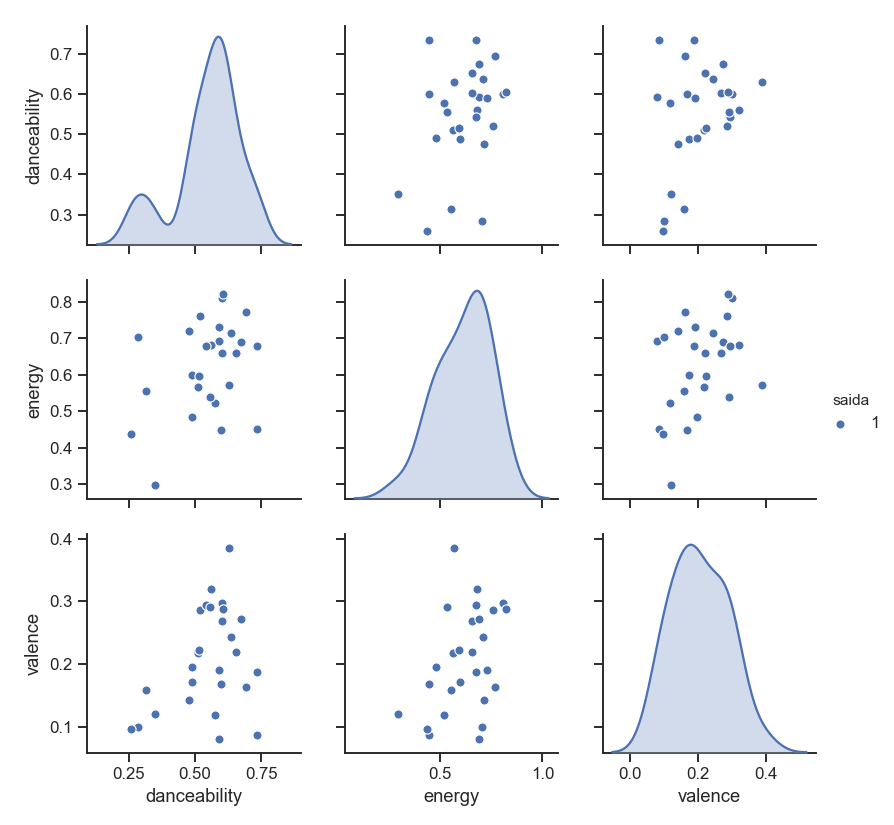

/Users/ellenbeatriz/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [36]:
sns.set(style="ticks")
sns.pairplot(grupo2_2017_2018, hue="saida", x_vars=variaveis_x, y_vars=variaveis_y)

<IPython.core.display.Javascript object>


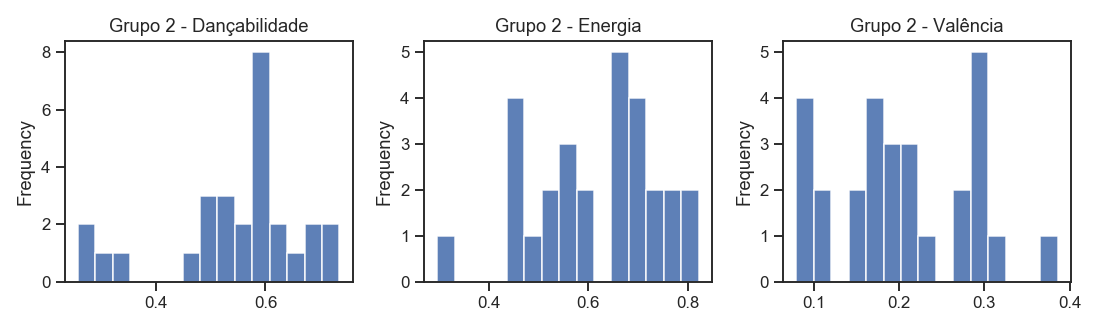

In [81]:
fig = plt.figure(figsize=(10, 3))
plt.subplot(131)
plot = grupo2_2017_2018.danceability.plot.hist(bins=15, title='Grupo 2 - Dançabilidade', alpha=0.9)

plt.subplot(132)
plot = grupo2_2017_2018.energy.plot.hist(bins=15, title='Grupo 2 - Energia', alpha=0.9)

plt.subplot(133)
plot = grupo2_2017_2018.valence.plot.hist(bins=15, title='Grupo 2 - Valência', alpha=0.9)

plt.tight_layout(1)

Ao observarmos os gráficos plotados acima, nota-se que a energia desse grupo gira em torno de 0.7, porém o grupo apresenta um número considerável de músicas com valores de energia bem baixos (entre 0.3 - 0.4) e os valore de energia são no geral altos (0.8). Já a valência do grupo chega no máximo à 0.4, ou seja, são valores bem baixos. 
Assim, conclui-se que as músicas desse grupo são negativas e mais deprimentes. 

- **Grupo 3: Grupo Azul**
    - Nota-se pelo gráfico de dispersão que essas músicas apresentam valência, energia e dançabilidade altos.

<IPython.core.display.Javascript object>


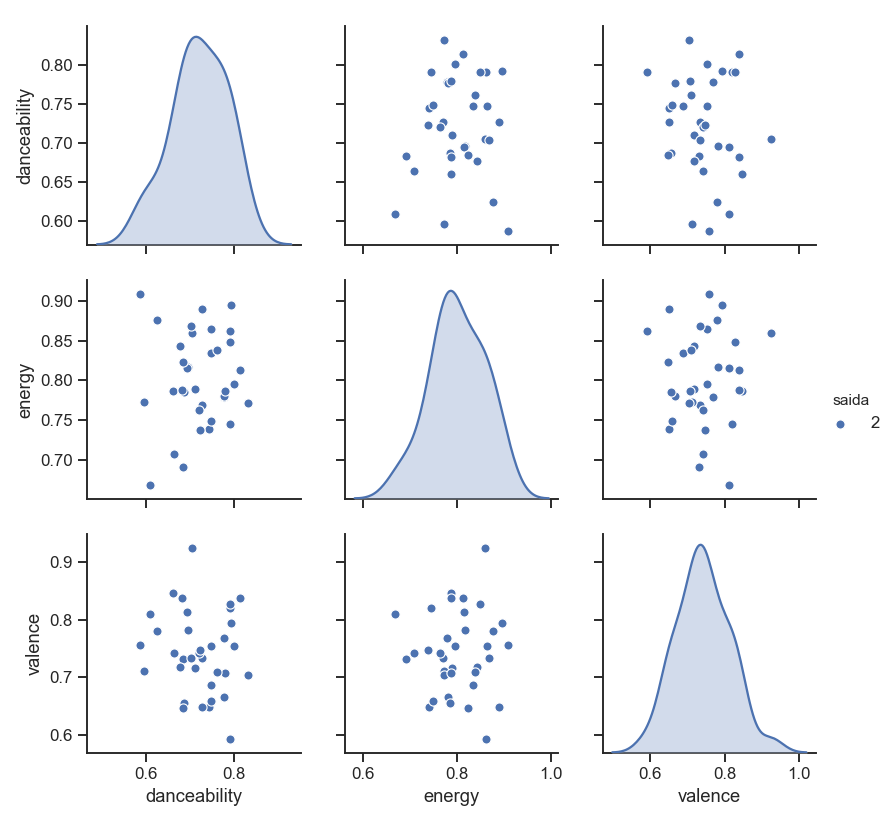

/Users/ellenbeatriz/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [39]:
sns.set(style="ticks")
sns.pairplot(grupo3_2017_2018, hue="saida", x_vars=variaveis_x, y_vars=variaveis_y)

<IPython.core.display.Javascript object>


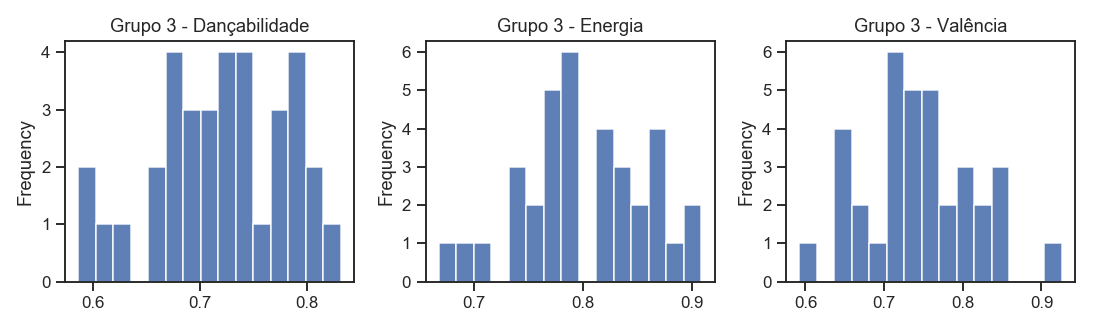

In [86]:
fig = plt.figure(figsize=(10, 3))
plt.subplot(131)
plot = grupo3_2017_2018.danceability.plot.hist(bins=15, title='Grupo 3 - Dançabilidade', alpha=0.9)

plt.subplot(132)
plot = grupo3_2017_2018.energy.plot.hist(bins=15, title='Grupo 3 - Energia', alpha=0.9)

plt.subplot(133)
plot = grupo3_2017_2018.valence.plot.hist(bins=15, title='Grupo 3 - Valência', alpha=0.9)

plt.tight_layout(1)

Observando os gráficos acima conclui-se que as hipóteses iniciais estavam corretas. A dançabilidade do grupo é no geral maior que 0.8 e a energia e a valência maiores que 0.9. Ou seja, as músicas desse grupo são no geral bem dançantes, bem energéticas e muito positivas. 

- **Grupo 4: Grupo Preto**
    - Músicas com valência baixa, porém nota-se que a dançabilidade desse grupo é mais alta em relação ao Grupo 2 

<IPython.core.display.Javascript object>


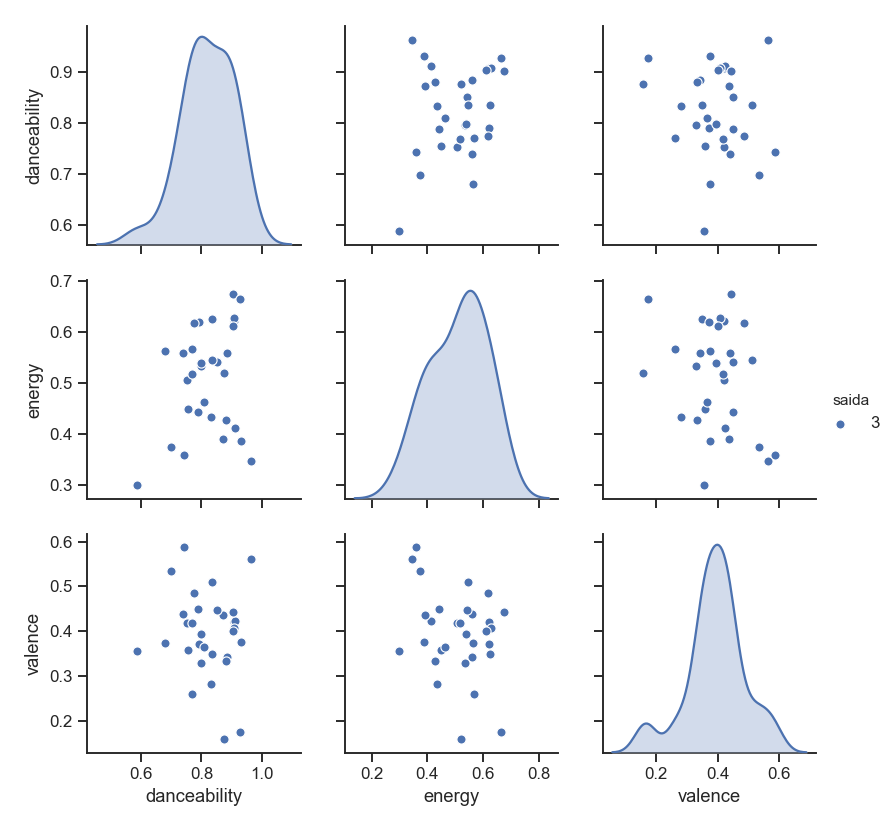

In [41]:
sns.set(style="ticks")
sns.pairplot(grupo4_2017_2018, hue="saida", x_vars=variaveis_x, y_vars=variaveis_y)

<IPython.core.display.Javascript object>


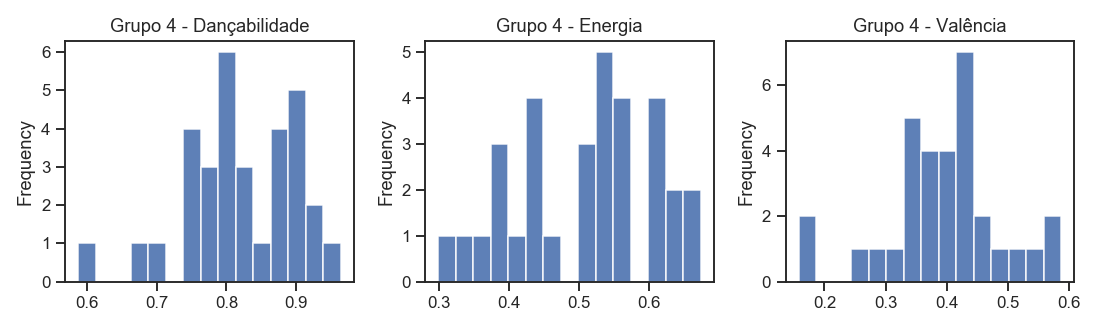

In [85]:
fig = plt.figure(figsize=(10, 3))
plt.subplot(131)
plot = grupo4_2017_2018.danceability.plot.hist(bins=15, title='Grupo 4 - Dançabilidade', alpha=0.9)

plt.subplot(132)
plot = grupo4_2017_2018.energy.plot.hist(bins=15, title='Grupo 4 - Energia', alpha=0.9)

plt.subplot(133)
plot = grupo4_2017_2018.valence.plot.hist(bins=15, title='Grupo 4 - Valência', alpha=0.9)

plt.tight_layout(1)

Nota-se que a dançabilidade desse grupo é alta, girando em torno de 0.8, a energia é mediana, sendo no geral em torno de 0.5 e 0.7. Já a valência do grupo 4 é baixa, igualmente ao grupo 2, girando de 0.6 para baixo e com um número relevante de músicas entre 0.2 e 0.3. 
Portanto, as músicas desse grupo são no geral bem dançantes, porém são negativas e deprimentes

- **Grupo 5: Grupo Roxo**
    - Nota-se que esse grupo apresenta uma alta valência e dançabilidade, porém a energia do grupo não é tão concentrada

<IPython.core.display.Javascript object>


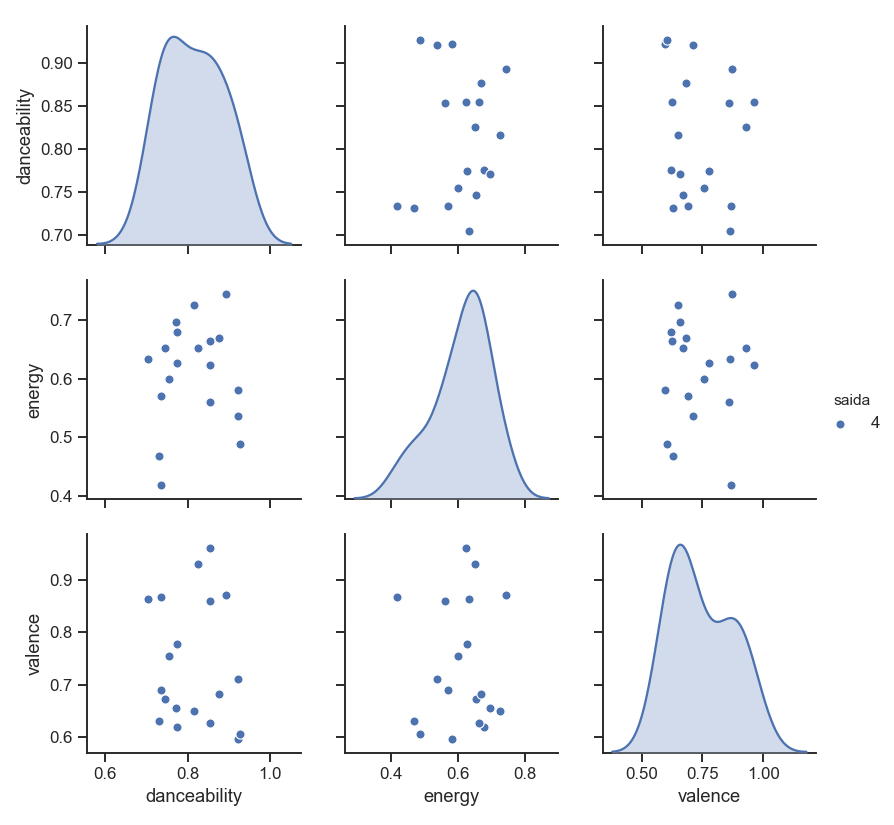

/Users/ellenbeatriz/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [43]:
sns.set(style="ticks")
sns.pairplot(grupo5_2017_2018, hue="saida", x_vars=variaveis_x, y_vars=variaveis_y)

<IPython.core.display.Javascript object>


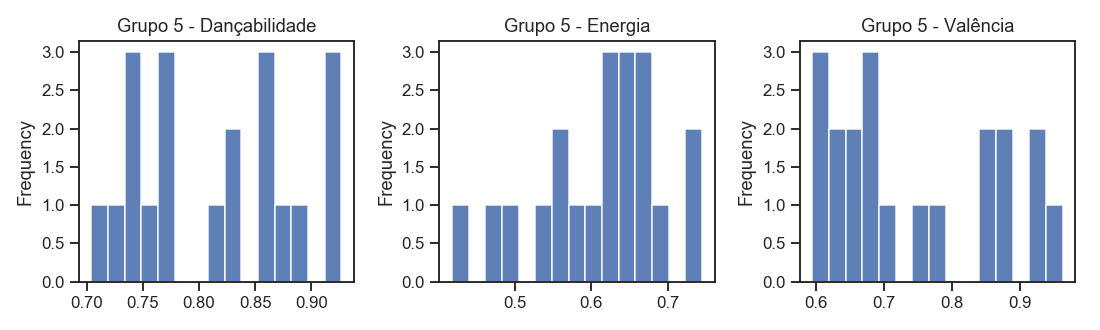

In [88]:
fig = plt.figure(figsize=(10, 3))
plt.subplot(131)
plot = grupo5_2017_2018.danceability.plot.hist(bins=15, title='Grupo 5 - Dançabilidade', alpha=0.9)

plt.subplot(132)
plot = grupo5_2017_2018.energy.plot.hist(bins=15, title='Grupo 5 - Energia', alpha=0.9)

plt.subplot(133)
plot = grupo5_2017_2018.valence.plot.hist(bins=15, title='Grupo 5 - Valência', alpha=0.9)

plt.tight_layout(1)

Como nota-se nos gráficos acima a dançabilidade do grupo é alta, chegando à valores maiores que 0.9, e a valência também, girando em torno de 0.9 e 0.8, porém a energia desse grupo não é tão alta nem tão concentrada, não alcançando valores de 0.8 e com uma quantidade de músicas considerável em valores mais baixos. 
Portanto, as músicas desse grupo são dançantes e positivas, porém não há como classificar a energia das mesmas. 

## Análisa Qualitativa sobre a base de teste

<IPython.core.display.Javascript object>


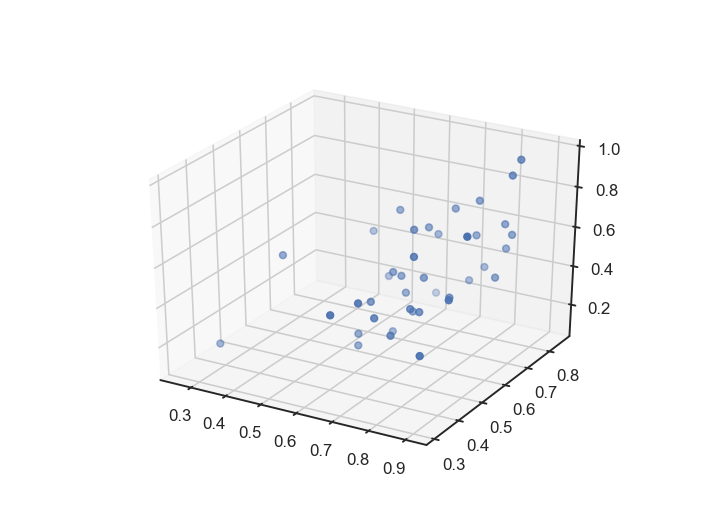

In [53]:
plt3d_teste_2017_2018 = plt.figure().gca(projection="3d")
plt3d_teste_2017_2018.scatter(top_2017_2018_teste.danceability, top_2017_2018_teste.energy, top_2017_2018_teste.valence)

In [50]:
teste_entrada_2017_2018 = top_2017_2018_teste.loc[:,("danceability", "energy", "valence")]

In [51]:
clusters_teste_2017_2018 = cluster.MiniBatchKMeans(n_clusters=5)
clusters_teste_2017_2018.fit(teste_entrada_2017_2018)
saida_teste_2017_2018 = clusters_teste_2017_2018.predict(teste_entrada_2017_2018)

In [54]:
musicas_teste_2017_2018 = teste_entrada_2017_2018.copy()
musicas_teste_2017_2018["saida"] = saida_teste_2017_2018

<IPython.core.display.Javascript object>


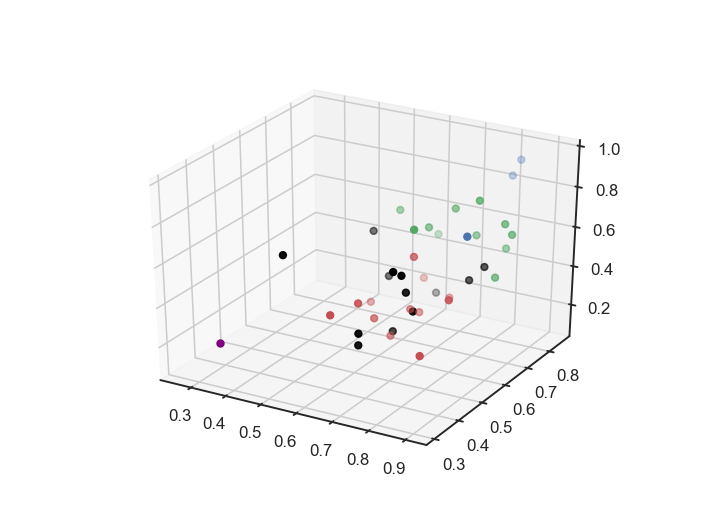

In [55]:
plt3d_teste_2017_2018 = plt.figure().gca(projection="3d")
grupo1_teste_2017_2018 = musicas_teste_2017_2018[musicas_teste_2017_2018.saida==0]
grupo2_teste_2017_2018 = musicas_teste_2017_2018[musicas_teste_2017_2018.saida==1]
grupo3_teste_2017_2018 = musicas_teste_2017_2018[musicas_teste_2017_2018.saida==2]
grupo4_teste_2017_2018 = musicas_teste_2017_2018[musicas_teste_2017_2018.saida==3]
grupo5_teste_2017_2018 = musicas_teste_2017_2018[musicas_teste_2017_2018.saida==4]

plt3d_teste_2017_2018.scatter(grupo1_teste_2017_2018.danceability, grupo1_teste_2017_2018.energy, grupo1_teste_2017_2018.valence, color="r")
plt3d_teste_2017_2018.scatter(grupo2_teste_2017_2018.danceability, grupo2_teste_2017_2018.energy, grupo2_teste_2017_2018.valence, color="g")
plt3d_teste_2017_2018.scatter(grupo3_teste_2017_2018.danceability, grupo3_teste_2017_2018.energy, grupo3_teste_2017_2018.valence, color="b")
plt3d_teste_2017_2018.scatter(grupo4_teste_2017_2018.danceability, grupo4_teste_2017_2018.energy, grupo4_teste_2017_2018.valence, color="black")
plt3d_teste_2017_2018.scatter(grupo5_teste_2017_2018.danceability, grupo5_teste_2017_2018.energy, grupo5_teste_2017_2018.valence, color="purple")


## Conclusão

Com a ausência de uma base de dados, que sirva como um gabarito, não é possivel atribuir as músicas de teste para os mesmos clusters das músicas de treinamento. Como pode-se observar no gráfico acima, o agrupamento feito na base de teste foi realizado entre as próprias músicas do teste e não foi relacionado com o treinamento feito anteriormente.

Como uma futura iteração para o projeto busca-se fazer a clusterização da base teste utilizando o resultado da base de treinamento como parâmetro. 